<a href="https://colab.research.google.com/github/AnjaliBiju/Machine-Learning-Colab/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MACHINE LEARNING**

Cross Validation and Bias Variance Trade Off

*   A low variance, low bias model is a really good prediction model
*   a low bias, high variance model will be very close to the target but will be scattered all over the place

Logistic Regression

Sigmoid Function:

*   fi(z)=1/(1+ (e^-z) )

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import files   #to upload files manually
uploaded=files.upload()

Saving train.csv to train.csv


In [3]:
train= pd.read_csv('train.csv')

In [5]:
train.head()    #SibSp indicates the number of siblings or spouses overboard

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#to see the missing data
train.isnull()    #True shows where the missing data is

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

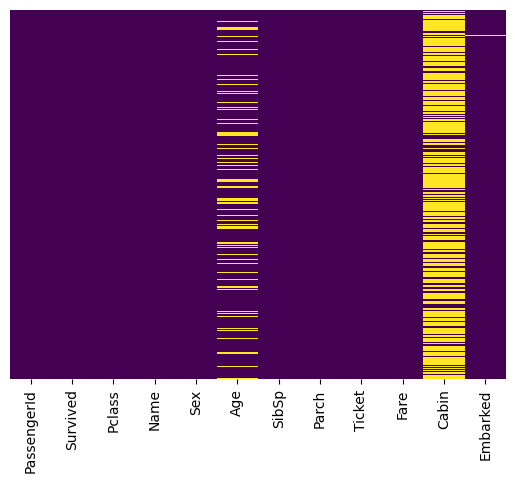

In [10]:
sns.heatmap(train.isnull(),yticklabels=False, cbar=False, cmap='viridis')
#yticklabels=False.. dont show the y axis labels to avoid cluttering
#cbar=False.. dont show the color bar which normally indicates the scale of the heatmap
#bright lines indicate missing values!

The cabin data indicates that too much of data is actually missing in Cabin column to do something with it

In [11]:
sns.set_style('whitegrid')

<Axes: xlabel='Survived', ylabel='count'>

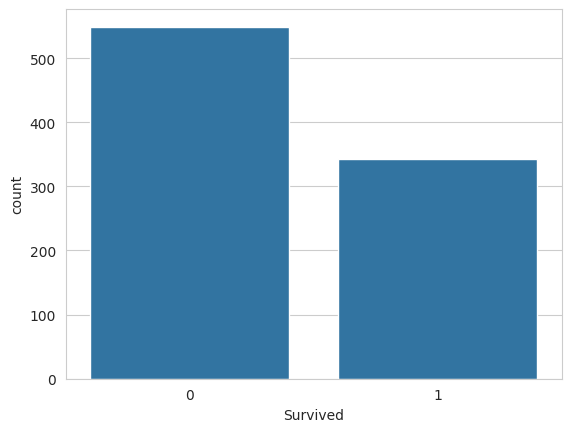

In [12]:
#to see the number of people who survived
sns.countplot(x='Survived',data=train)

<Axes: xlabel='Survived', ylabel='count'>

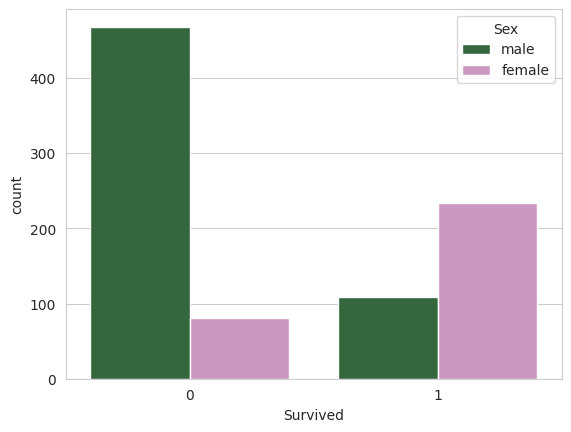

In [15]:
#to get the count of people who survived (discriminating sex)
sns.countplot(x='Survived',data=train,hue='Sex',palette='cubehelix')

<Axes: xlabel='Survived', ylabel='count'>

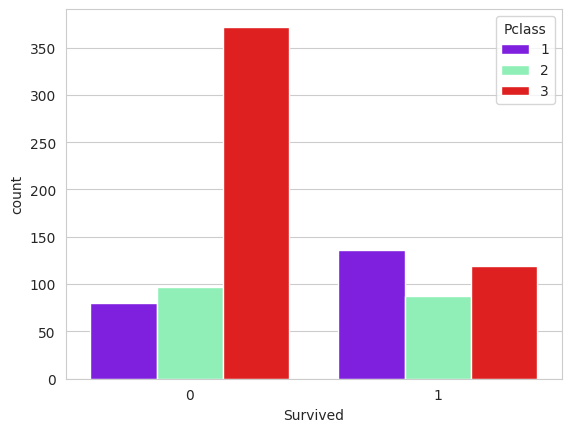

In [16]:
#get the count of people who survived based on the Passenger Class they were travelling in
sns.countplot(x='Survived',data=train,hue='Pclass',palette='rainbow')

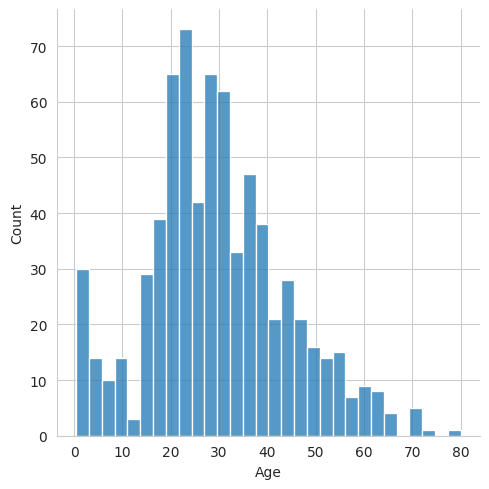

In [19]:
sns.displot(train['Age'].dropna(),kde=False,bins=30)
#dropna() removes any rows where Age is Nan, ie missing
#kde=Flase, dont show the curve
#bins=30.. will divide the range into equal 30 width intervals

<Axes: ylabel='Frequency'>

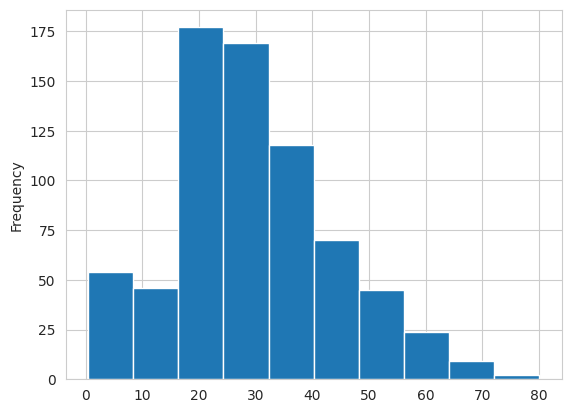

In [20]:
train['Age'].plot.hist()

<Axes: ylabel='Frequency'>

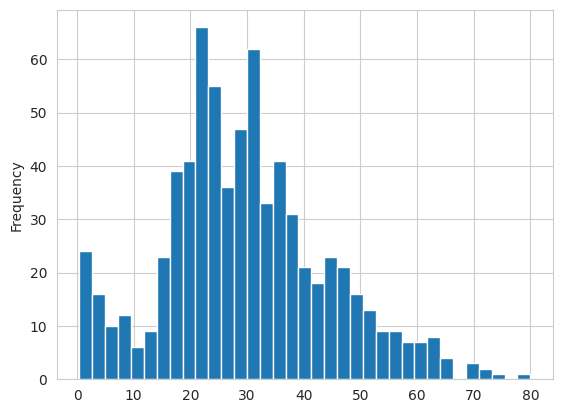

In [21]:
train['Age'].plot.hist(bins=35)